# Jupter notebook - Load Cases in steady state for vehicles that have double wishbone suspension
autor - Enzo Fogaça de Gobi enzo.fgobi@gmail.com / enzo.fgobi@usp.br

01/2024 SP, Brazil

---



In [1]:
import numpy as np

# Introduction
# Inputs:


*   Suspension Hard-points
*   Contact Patch Points
*   Hub Center Points
*   Mass of the Front Unsprung Mass
*   Mass of the Rear Unsprung Mass
*   Mass of the Sprung Mass
*   Front Track
*   Rear Track
*   Wheelbase
*   longitudinal distance between the front axis and the CG
*   longitudinal distance between the rear axis and the CG
*   Center of Gravity height
*   Front Unsprung Mass Center of Gravity height
*   Rear Unsprung Mass Center of Gravity height
*   Front Roll Rate
*   Rear Roll Rate
*   Pitch Rate
*   Gravity
*   Lateral acceleration
*   Longitudinal acceleration
*   Fx versus Fz Angular Coefficient - tire model
*   Fx versus Fz Linear Coefficient - tire model
*   Fy versus Fz Angular Coefficient - tire model
*   Fy versus Fz Linear Coefficient - tire model
*   Mx versus Fz Angular Coefficient - tire model
*   Mx versus Fz Linear Coefficient - tire model
*   Mz versus Fz Angular Coefficient - tire model
*   Mz versus Fz Linear Coefficient - tire model

# Outputs:

*  Normal Forces in each suspension arms components
*   Forces and moments applied to the Hub Center

Secondary Outputs

*   Front Roll Center Height
*   Rear Roll Center Height
*   Vertical Loads on each tire
*   Forces and Moments applied to the Contact Patch



# Suspension Hard-points inputs

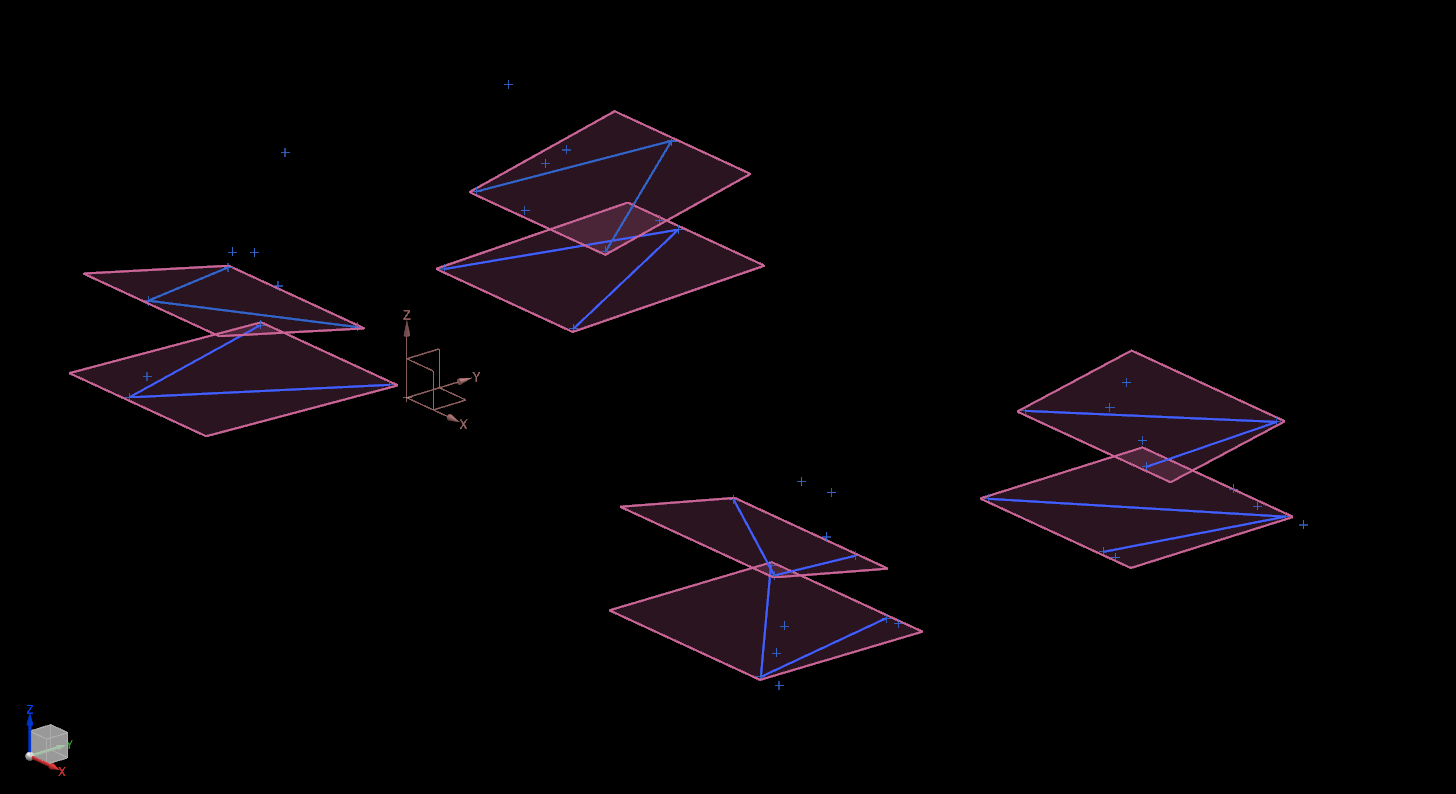



In [2]:
# Front Left Points (in mm)
#..............................................................

#Input the coordinates of the points of the upper left front A-arm
FLUCAF = [-117.50, -185.28, 127.15]       #Left,Front,Upper,Control Arm,Front
FLUCAR = [109.02, -185.28, 127.15]        #Left,Front,Upper,Control Arm,Rear
FLUCAU = [-7.65, -553.10, 139.53]       #Left,Front,Upper,Control Arm,Upright
#..............................................................

#Input the coordinates of the points of the lower left front A-arm
FLLCAF = [-135, -250.35, 241.18]       #Left,Front,Lower,Control Arm,Front
FLLCAR = [150, -250.35, 242.27]        #Left,Front,Lower,Control Arm,Rear
FLLCAU = [7.54, -527.19, 299.0]        #Left,Front,Lower,Control Arm,Upright
#..............................................................

#Input the coordinates of the points of left front Push Rod
FLCPR = [-17.22, -293.22, 313.94]      #Left,Rear,Chassis,Push Rod
FLUPR = [-9.02, -515.99, 164.43]       #Left,Rear,Upright,Push Rod
#..............................................................

#Input the coordinates of the points of left front Tie Rod
FLCTR = [-60.0, -160.0, 145.0]          #Left,Rear,Chassis,Tie Rod
FLUTR = [-85.0, -515.0, 180.0]          #Left,Rear,Upright,Tie Rod
#..............................................................

#..............................................................
# Front Right Points (in mm)
#..............................................................

#Input the coordinates of the points of the upper right front A-arm
FRUCAF = [-117.50, 185.28, 127.15]        #Right,Front,Upper,Control Arm,Front
FRUCAR = [109.02, 185.28, 127.15]         #Right,Front,Upper,Control Arm,Rear
FRUCAU = [-7.65, 553.10, 139.53]        #Right,Front,Upper,Control Arm,Upright
#..............................................................

#Input the coordinates of the points of the lower right front A-arm
FRLCAF = [-135, 250.35, 241.18]        #Right,Front,Lower,Control Arm,Front
FRLCAR = [150, 250.35, 242.27]         #Right,Front,Lower,Control Arm,Rear
FRLCAU = [7.54, 527.19, 299.0]         #Right,Front,Lower,Control Arm,Upright
#..............................................................

#Input the coordinates of the points of right front Push Rod
FRCPR = [-17.22, 293.22, 313.94]       #Right,Rear,Chassis,Push Rod
FRUPR = [-9.02, 515.99, 164,43]              #Right,Rear,Upright,Push Rod
#..............................................................

#Input the coordinates of the points of right front Tie Rod
FRCTR = [-60.0, 160.0, 145.0]  #Right,Rear,Chassis,Tie Rod
FRUTR = [-85.0, 515.0, 180.0] #Right,Rear,Upright,Tie Rod
#..............................................................

#..............................................................
# Rear Left Points (in mm)
#..............................................................

#Input the coordinates of the points of the upper left rear A-arm
RLUCAF = [1170, -218.74, 141.28]       #Left,Rear,Upper,Control Arm,Front
RLUCAR = [1455.0, -218.74, 141.28]       #Left,Rear,Upper,Control Arm,Rear
RLUCAU = [1525.03, -528.10, 143.56]   #Left,Rear,Upper,Control Arm,Upright
#..............................................................

#Input the coordinates of the points of the lower left rear A-arm
RLLCAF = [1170, -293.51, 270.31]        #Left,Rear,Lower,Control Arm,Front
RLLCAR = [1470, -293.51, 270.31]        #Left,Rear,Lower,Control Arm,Rear
RLLCAU = [1531.31, -506.07, 310.86]      #Left,Rear,Lower,Control Arm,Upright
#..............................................................

#Input the coordinates of the points of left rear Push Rod
RLCPR = [1378.21, -327.07, 374.98]         #Left,Rear,Chassis,Push Rod
RLUPR = [1510.17, -484.39, 167.64]      #Left,Upright,Lower,Push Rod
#..............................................................

#Input the coordinates of the points of left rear Tie Rod
RLCTR = [1485.0, -218.74, 141.28]         #Left,Rear,Chassis,Tie Rod
RLUTR = [1570.03, -528.1, 143.56]        #Left,Rear,Upright,Tie Rod
#..............................................................

#..............................................................
# Rear Right Points (in mm)
#..............................................................

#Input the coordinates of the points of the upper right rear A-arm
RRUCAF = [1170, 218.74, 141.28]      #Right,Rear,Upper,Control Arm,Front
RRUCAR = [1455.0, 218.74, 141.28]     #Right,Rear,Upper,Control Arm,Rear
RRUCAU = [1525.03, 528.10, 143.56]  #Right,Rear,Upper,Control Arm,Upright
#..............................................................

#Input the coordinates of the points of the lower right rear A-arm
RRLCAF = [1170, 293.51, 270.31]      #Right,Rear,Lower,Control Arm,Front
RRLCAR = [1470, 293.51, 270.31]      #Right,Rear,Lower,Control Arm,Rear
RRLCAU = [1531.31, 506.07, 310.86]    #Right,Rear,Lower,Control Arm,Upright
#..............................................................

#Input the coordinates of the points of right rear Push Rod
RRCPR = [1378, 327.07, 374.98]       #Right,Rear,Chassis,Push Rod
RRUPR = [1510.17, 484.39, 167.64]    #Right,Rear,Upright,Push Rod
#..............................................................

#Input the coordinates of the points of right rear Tie Rod
RRCTR = [1485.0, 218.74, 141.28]       #Right,Rear,Chassis,Tie Rod
RRUTR = [1570.03, 528.1, 143.56]      #Right,Rear,Upright,Tie Rod
#..............................................................

#..............................................................
# Contact Patch points (in mm)
#..............................................................

FLCPC = [0.0, -600.0, 0.0]             #Front Left Contact Patch Center
FRCPC = [0.0, 600.0, 0.0]              #Front Right Contact Patch Center
RLCPC = [1530.0, -575.0, 0.0]            #Rear Left Contact Patch Center
RRCPC = [1530.0, 575.0, 0.0]             #Rear Right Contact Patch Center

#..............................................................
# Hub Centers points (in mm)
#..............................................................

FLHC = [0.0,-600.0,228.6]           #Front Left Hub Center
FRHC = [0.0,600.0,228.6]             #Front Right Hub Center
RLHC = [1530.0,-575.0,228.6]          #Rear Left Hub Center
RRHC = [1530.0,575.0,228.6]           #Rear Right Hub Center

#General Inputs

In [3]:
g = 9.8              #gravity (in m/s2)
Wuf = 12             #Weight - unsprung mass front (in Kg)
Wur = 12             #Weight - unsprung mass rear (in Kg)
Ws = 210             #Weight - sprung mass (in Kg)

Tf = 1200            #Track - front (in mm)
Tr = 1150            #Track - rear (in mm)

l = 1500             #Wheelbase (in mm)
xf = 800             #Longitudinal distance between the front axis and CG position (in mm)
xr = 700             #Longitudinal distance between the rear axis and CG position (in mm)

hs = 268             #Center of Gravity Height (in mm)
Zuf = 228.6          #Center of Gravity Height - unsprung mass front (in mm)
Zur = 228.6          #Center of Gravity Height - unsprung mass front (in mm)

Ktf = 36096          #Roll rate - front (in Nm/rad)
Ktr = 32659          #Roll rate - rear (in Nm/rad)
Ktp = 2389           #Pitch rate (in Nm/rad)

In [4]:
Ay = -1.2          #Lateral acceleration applied on CG (in g's)      (Positive values = Left hand turn)
Ax = 0.0           #Longitudinal acceleration applied on CG (in g's) (Negative values = braking)

# Tire Data

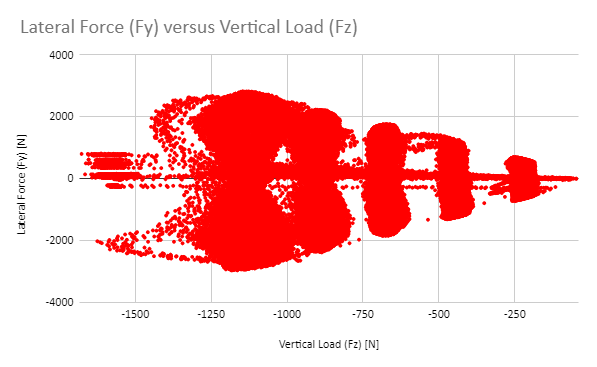

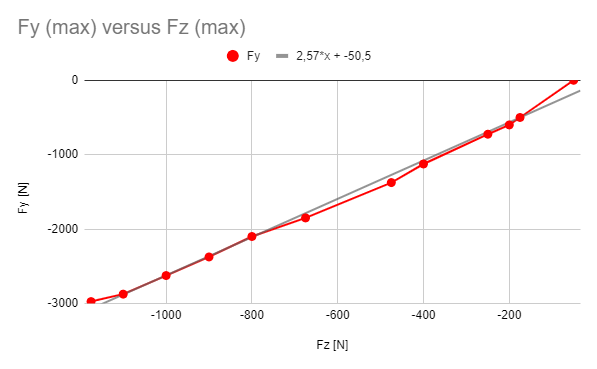

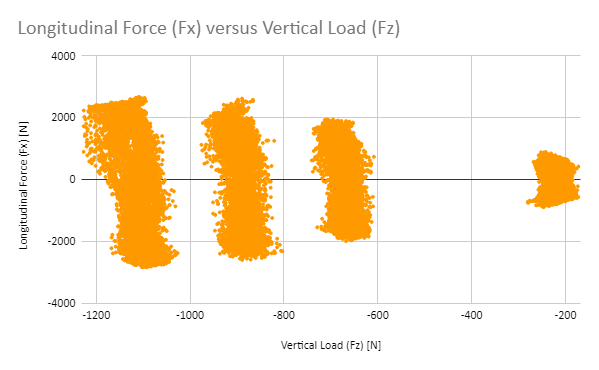

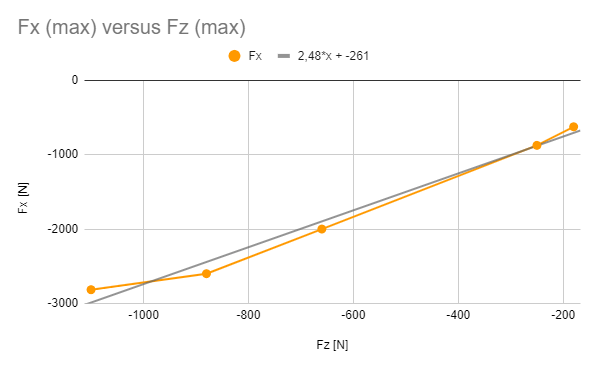

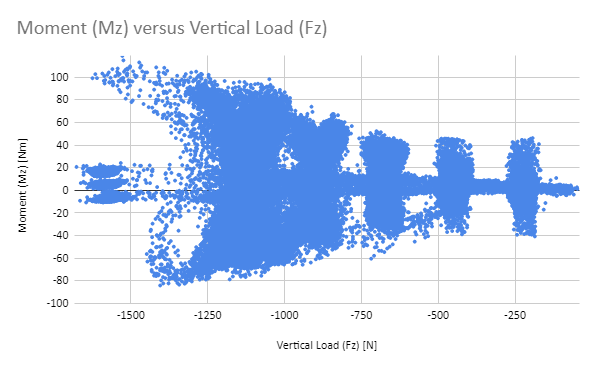

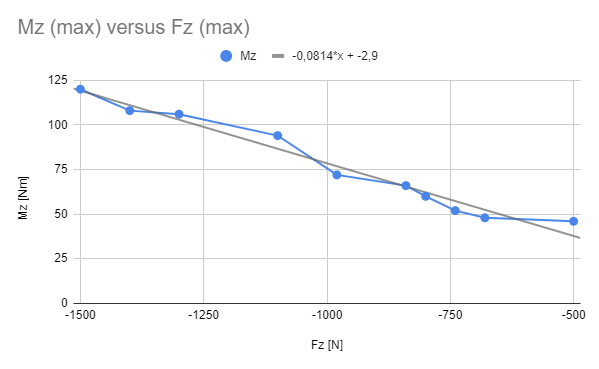

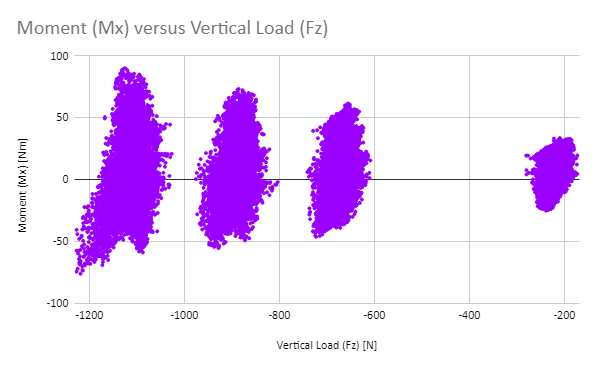

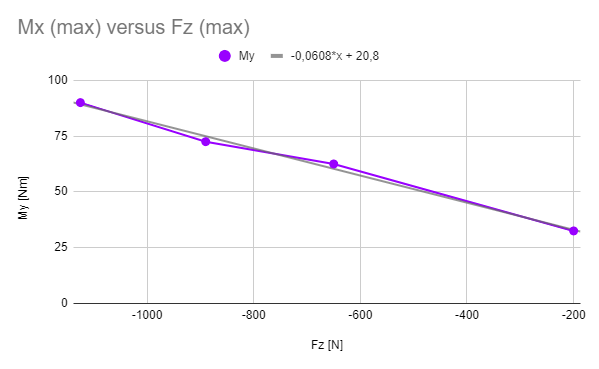

In [5]:
FcTTC = 2/3 #Correction Factor used in the tire model TTC (for exemple)

In [6]:
ac_Fx = 2.48   #angular coeficient (Fx versus Fz)
lc_Fx = -261   #linear coeficient (Fx versus Fz)
ac_Fy = 2.57   #angular coeficient (Fy versus Fz)
lc_Fy = -50.5  #linear coeficient (Fy versus Fz)
ac_Mx = +0.06  #angular coeficient (Mx versus Fz)
lc_Mx = -20.8  #linear coeficient (Mx versus Fz)
ac_My = 0      #angular coeficient (Mx versus Fz)
lc_My = 0      #linear coeficient (Mx versus Fz)
ac_Mz = +0.08  #angular coeficient (Mz versus Fz)
lc_Mz = -2.9   #linear coeficient (Mz versus Fz)

# Functions

Roll Centers functions

In [7]:
def coef_angular(point1, point2):
  coef_a = (point2[2] - point1[2])/(point2[1] - point1[1])
  return coef_a

In [8]:
def point_intersection(point1, point2, point3, point4):
    # Extracts the coordinates of the points
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    x3, y3, z3 = point3
    x4, y4, z4 = point4

    # Calculates the angular coefficients of the lines
    m1 = coef_angular(point1, point2)
    m2 = coef_angular(point3, point4)

    # Checks if the lines are parallel
    if m1 == m2:
        print("The lines are parallel, there is no point of intersection.")
        return None

    # Calculates the coordinates of the intersection point
    y_intersection = (m1 * y1 - m2 * y3 + z3 - z1) / (m1 - m2)
    z_intersection = m1 * (y_intersection - y1) + z1

    # Returns the intersection point as a list [x, y, z]
    return [0, y_intersection, z_intersection]

In [9]:
def front_roll_center():
  FICL = point_intersection(FLUCAF, FLUCAU, FLLCAF, FLLCAU)   #Front Instant Center Left
  FICR = point_intersection(FRUCAF, FRUCAU, FRLCAF, FRLCAU)   #Front Instant Center Right
  FRC = point_intersection(FRCPC, FICR, FLCPC, FICL)          #Front Roll Center
  return FRC[2]

In [10]:
def rear_roll_center():
  RICL = point_intersection(RLUCAF, RLUCAU, RLLCAF, RLLCAU)   #Rear Instant Center Left
  RICR = point_intersection(RRUCAF, RRUCAU, RRLCAF, RRLCAU)   #Rear Instant Center Right
  RRC = point_intersection(RRCPC, RICR, RLCPC, RICL)          #Rear Roll Center
  return RRC[2]

Load Transfer Functions

In [11]:
Zrcf = hs - front_roll_center()
Zrcr = hs - rear_roll_center()

In [12]:
def DeltaLT (Ax, Ay):

  DeltaLatWusF = Wuf*(Ay*g)*(Zuf)/Tf                                                           #Front Lateral Load Transfer - Unsprung Mass (in N)
  DeltaLatWusR = Wur*(Ay*g)*(Zur)/Tr                                                           #Rear Lateral Load Transfer - Unsprung Mass (in N)

  DeltaLatWrcF = ((Ws*(Ay*g)*(Zrcf))/Tf)*((l-xf)/l)                                            #Front Lateral Load Transfer - due to Roll Center (in N)
  DeltaLatWrcR = ((Ws*(Ay*g)*(Zrcr))/Tr)*((l-xr)/l)                                            #Rear Lateral Load Transfer - due to Roll Center (in N)

  DeltaLatWtF = ((Ws*(Ay*g)*(hs))/Tf)*((Ktf + Ws*hs/1000)/(Ktf + Ktr - Ws*hs/1000))*((l-xf)/l) #Front Laterarl Load Transfer - due to srings and anti roll bars (roll) (in N)
  DeltaLatWtR = ((Ws*(Ay*g)*(hs))/Tr)*((Ktr + Ws*hs/1000)/(Ktf + Ktr - Ws*hs/1000))*((l-xr)/l) #Rear Laterarl Load Transfer - due to srings and anti roll bars (roll) (in N)

  DeltaWTotalLatF = DeltaLatWusF + DeltaLatWrcF + DeltaLatWtF                                  #Front Total Lateral Load Transfer (in N)
  DeltaWTotalLatR = DeltaLatWusR + DeltaLatWrcR + DeltaLatWtR                                  #Rear Total Lateral Load Transfer (in N)

  #--------------------------------------------------------------------------------------------------------------------------------------------------------------------

  DeltaLonWus = (Wuf+Wur)*(Ax*g)/l                                                             #Longitudinal Load Transfer - Unsprung Mass (in N)
  DeltaLonWpc = (Ws*(Ax*g)*hs)/l                                                               #Longitudinal Load Transfer - due to Pitch Center (in N)
  DeltaLonWpt = ((Ws*(Ax*g)*(hs))/l)*((Ktp + Ws*hs/1000)/(Ktp + Ktp - Ws*hs/1000))             #Longitudinal Load Transfer - due to srings (pitch) (in N)

  DeltaWTotalLon = DeltaLonWus + DeltaLonWpc + DeltaLonWpt                                     #Total longitudinal Load Transfer (in N)

  return DeltaWTotalLatF, DeltaWTotalLatR, DeltaWTotalLon

In [13]:
Wfl = (Ws*((l-xf)/l)/2 + Wuf)*g                                                                #Front Left Weight Without Load Transfer
Wfr = (Ws*((l-xf)/l)/2 + Wuf)*g                                                                #Front Right Weight Without Load Transfer
Wrl = (Ws*((l-xr)/l)/2 + Wur)*g                                                                #Rear Left Weight Without Load Transfer
Wrr = (Ws*((l-xr)/l)/2 + Wur)*g                                                                #Rear Right Weight Without Load Transfer

In [14]:
LDWfl = -(Wfl + (DeltaLT(Ax, Ay)[0])/2 - (DeltaLT(Ax, Ay)[2])/4)                               #Front Left Weight With Load Transfer
LDWfr = -(Wfr - (DeltaLT(Ax, Ay)[0])/2 - (DeltaLT(Ax, Ay)[2])/4)                               #Front Right Weight With Load Transfer
LDWrl = -(Wrl + (DeltaLT(Ax, Ay)[1])/2 + (DeltaLT(Ax, Ay)[2])/4)                               #Rear Left Weight With Load Transfer
LDWrr = -(Wrl - (DeltaLT(Ax, Ay)[1])/2 + (DeltaLT(Ax, Ay)[2])/4)                               #Rear Right Weight With Load Transfer

Forces and Moments Functions

In [15]:
def FxCP(Fz,ac_Fx,lc_Fx):
  FxCP = FcTTC*(Fz*ac_Fx + lc_Fx)
  return FxCP

def FyCP(Fz,ac_Fy,lc_Fy):
  FyCP = FcTTC*(Fz*ac_Fy + lc_Fy)
  return FyCP

def MxCP(Fz,ac_Mx,lc_Mx):
  MxCP = FcTTC*(Fz*ac_Mx + lc_Mx)
  return MxCP

def MyCP(Fz,ac_My,lc_My):
  MyCP = FcTTC*(Fz*ac_My + lc_My)
  return MyCP

def MzCP(Fz,ac_Mz,lc_Mz):
  MzCP = FcTTC*(Fz*ac_Mz + lc_Mz)
  return MzCP

Obs: transform the moment in the y axis into force on the x axis

In [16]:
FLTFx = FxCP(LDWfl,ac_Fx,lc_Fx)  #Front Left Tire Fx (in N)
FLTFy = FyCP(LDWfl,ac_Fy,lc_Fy)  #Front Left Tire Fy (in N)
FLTMx = MxCP(LDWfl,ac_Mx,lc_Mx)  #Front Left Tire Mx (in Nm)
FLTMy = MyCP(LDWfl,ac_My,lc_My)  #Front Left Tire My (in Nm)
FLTMz = MzCP(LDWfl,ac_Mz,lc_Mz)  #Front Left Tire Mz (in Nm)

FRTFx = FxCP(LDWfr,ac_Fx,lc_Fx)  #Front Right Tire Fx (in N)
FRTFy = FyCP(LDWfr,ac_Fy,lc_Fy)  #Front Right Tire Fy (in N)
FRTMx = MxCP(LDWfr,ac_Mx,lc_Mx)  #Front Right Tire Mx (in Nm)
FRTMy = MyCP(LDWfr,ac_My,lc_My)  #Front Right Tire My (in Nm)
FRTMz = MzCP(LDWfr,ac_Mz,lc_Mz)  #Front Right Tire Mz (in Nm)

RLTFx = FxCP(LDWrl,ac_Fx,lc_Fx)  #Rear Left Tire Fx (in N)
RLTFy = FyCP(LDWrl,ac_Fy,lc_Fy)  #Rear Left Tire Fy (in N)
RLTMx = MxCP(LDWrl,ac_Mx,lc_Mx)  #Rear Left Tire Mx (in Nm)
RLTMy = MyCP(LDWrl,ac_My,lc_My)  #Rear Left Tire My (in Nm)
RLTMz = MzCP(LDWrl,ac_Mz,lc_Mz)  #Rear Left Tire Mz (in Nm)

RRTFx = FxCP(LDWrr,ac_Fx,lc_Fx)  #Rear Right Tire Fx (in N)
RRTFy = FyCP(LDWrr,ac_Fy,lc_Fy)  #Rear Right Tire Fy (in N)
RRTMx = MxCP(LDWrr,ac_Mx,lc_Mx)  #Rear Right Tire Mx (in Nm)
RRTMy = MyCP(LDWrr,ac_My,lc_My)  #Rear Right Tire My (in Nm)
RRTMz = MzCP(LDWrr,ac_Mz,lc_Mz)  #Rear Right Tire Mz (in Nm)

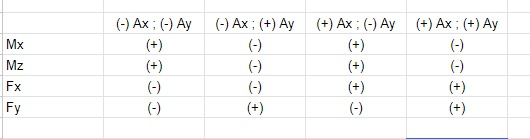

In [17]:
def CPCtoHC (Fz_CP, Fx_CP, Fy_CP, Mx_CP, My_CP, Mz_CP, CPC, HC): #Contact Patch to Hub Center
  #function that recives: Geometric point of the Contact Patch, Forces and Moments of the Contact Patch and the geometric point of the Hub Center - Output: Forces and Moments on the Hub Center
  if Fz_CP > 0:
      Fx_HC = 0
      Fy_HC = 0
      Fz_HC = Fz_CP
      Mx_HC = 0
      My_HC = 0
      Mz_HC = 0

  if Ax < 0.0 and Ay < 0.0:
      Fx_HC = Fx_CP
      Fy_HC = Fy_CP
      Fz_HC = Fz_CP
      Mx_HC = (Mx_CP + (HC[2]-CPC[2])*Fy_CP/1000 + (HC[1]-CPC[1])*Fz_CP/1000)
      My_HC = (My_CP + (HC[2]-CPC[2])*Fx_CP/1000 + (HC[0]-CPC[0])*Fz_CP/1000)
      Mz_HC = (Mz_CP + (HC[0]-CPC[0])*Fy_CP/1000 + (HC[1]-CPC[1])*Fx_CP/1000)

  if Ax < 0.0 and Ay >= 0.0:
      Fx_HC = Fx_CP
      Fy_HC = Fy_CP
      Fz_HC = Fz_CP
      Mx_HC = (Mx_CP + (HC[2]-CPC[2])*Fy_CP/1000 + (HC[1]-CPC[1])*Fz_CP/1000)
      My_HC = (My_CP + (HC[2]-CPC[2])*Fx_CP/1000 + (HC[0]-CPC[0])*Fz_CP/1000)
      Mz_HC = (Mz_CP + (HC[0]-CPC[0])*Fy_CP/1000 + (HC[1]-CPC[1])*Fx_CP/1000)

  if Ax >= 0.0 and Ay < 0.0:
      Fx_HC = Fx_CP
      Fy_HC = Fy_CP
      Fz_HC = Fz_CP
      Mx_HC = (Mx_CP + (HC[2]-CPC[2])*Fy_CP/1000 + (HC[1]-CPC[1])*Fz_CP/1000)
      My_HC = (My_CP + (HC[2]-CPC[2])*Fx_CP/1000 + (HC[0]-CPC[0])*Fz_CP/1000)
      Mz_HC = (Mz_CP + (HC[0]-CPC[0])*Fy_CP/1000 + (HC[1]-CPC[1])*Fx_CP/1000)

  if Ax >= 0.0 and Ay >= 0.0:
      Fx_HC = Fx_CP
      Fy_HC = Fy_CP
      Fz_HC = Fz_CP
      Mx_HC = (Mx_CP + (HC[2]-CPC[2])*Fy_CP/1000 + (HC[1]-CPC[1])*Fz_CP/1000)
      My_HC = (My_CP + (HC[2]-CPC[2])*Fx_CP/1000 + (HC[0]-CPC[0])*Fz_CP/1000)
      Mz_HC = (Mz_CP + (HC[0]-CPC[0])*Fy_CP/1000 + (HC[1]-CPC[1])*Fx_CP/1000)

  return Fx_HC, Fy_HC, Fz_HC, Mx_HC, My_HC, Mz_HC

Set the variable "manuever" to analise diferents types of conditions

In [18]:
#Set manuever = 1 if you want to analise a combinatade acceleration case (Ax & Ay != 0)
#Set manuever = 2 if you want to analise a pure lateral acceleration case (Ax = 0 & Ay != 0)
#Set manuever = 3 if you want to analise a pure longitudinal acceleration case (Ax != 0 & Ay = 0)
manuever = 2
#Do not forget to change de Ax and Ay input values!!!

In [19]:
if manuever == 1:
  FLHCFx = CPCtoHC(LDWfl, FLTFx, FLTFy, FLTMx, FLTMy, FLTMz, FLCPC, FLHC)[0]  #Front Left Hub Center Fx (in N) - combinatade acceleration case (Ax & Ay != 0)
  FLHCFy = CPCtoHC(LDWfl, FLTFx, FLTFy, FLTMx, FLTMy, FLTMz, FLCPC, FLHC)[1]  #Front Left Hub Center Fy (in N) - combinatade acceleration case (Ax & Ay != 0)
  FLHCFz = CPCtoHC(LDWfl, FLTFx, FLTFy, FLTMx, FLTMy, FLTMz, FLCPC, FLHC)[2]  #Front Left Hub Center Fz (in N) - combinatade acceleration case (Ax & Ay != 0)
  FLHCMx = CPCtoHC(LDWfl, FLTFx, FLTFy, FLTMx, FLTMy, FLTMz, FLCPC, FLHC)[3]  #Front Left Hub Center Mx (in Nm) - combinatade acceleration case (Ax & Ay != 0)
  FLHCMy = CPCtoHC(LDWfl, FLTFx, FLTFy, FLTMx, FLTMy, FLTMz, FLCPC, FLHC)[4]  #Front Left Hub Center My (in Nm) - combinatade acceleration case (Ax & Ay != 0)
  FLHCMz = CPCtoHC(LDWfl, FLTFx, FLTFy, FLTMx, FLTMy, FLTMz, FLCPC, FLHC)[5]  #Front Left Hub Center Mz (in Nm) - combinatade acceleration case (Ax & Ay != 0)

  FRHCFx = CPCtoHC(LDWfr, FRTFx, FRTFy, FRTMx, FRTMy, FRTMz, FRCPC, FRHC)[0]  #Front Right Hub Center Fx (in N) - combinatade acceleration case (Ax & Ay != 0)
  FRHCFy = CPCtoHC(LDWfr, FRTFx, FRTFy, FRTMx, FRTMy, FRTMz, FRCPC, FRHC)[1]  #Front Right Hub Center Fy (in N) - combinatade acceleration case (Ax & Ay != 0)
  FRHCFz = CPCtoHC(LDWfr, FRTFx, FRTFy, FRTMx, FRTMy, FRTMz, FRCPC, FRHC)[2]  #Front Right Hub Center Fz (in N) - combinatade acceleration case (Ax & Ay != 0)
  FRHCMx = CPCtoHC(LDWfr, FRTFx, FRTFy, FRTMx, FRTMy, FRTMz, FRCPC, FRHC)[3]  #Front Right Hub Center Mx (in Nm) - combinatade acceleration case (Ax & Ay != 0)
  FRHCMy = CPCtoHC(LDWfr, FRTFx, FRTFy, FRTMx, FRTMy, FRTMz, FRCPC, FRHC)[4]  #Front Right Hub Center My (in Nm) - combinatade acceleration case (Ax & Ay != 0)
  FRHCMz = CPCtoHC(LDWfr, FRTFx, FRTFy, FRTMx, FRTMy, FRTMz, FRCPC, FRHC)[5]  #Front Right Hub Center Mz (in Nm) - combinatade acceleration case (Ax & Ay != 0)

  RLHCFx = CPCtoHC(LDWrl, RLTFx, RLTFy, RLTMx, RLTMy, RLTMz, RLCPC, RLHC)[0]  #Rear Left Hub Center Fx (in N) - combinatade acceleration case (Ax & Ay != 0)
  RLHCFy = CPCtoHC(LDWrl, RLTFx, RLTFy, RLTMx, RLTMy, RLTMz, RLCPC, RLHC)[1]  #Rear Left Hub Center Fy (in N) - combinatade acceleration case (Ax & Ay != 0)
  RLHCFz = CPCtoHC(LDWrl, RLTFx, RLTFy, RLTMx, RLTMy, RLTMz, RLCPC, RLHC)[2]  #Rear Left Hub Center Fz (in N) - combinatade acceleration case (Ax & Ay != 0)
  RLHCMx = CPCtoHC(LDWrl, RLTFx, RLTFy, RLTMx, RLTMy, RLTMz, RLCPC, RLHC)[3]  #Rear Left Hub Center Mx (in Nm) - combinatade acceleration case (Ax & Ay != 0)
  RLHCMy = CPCtoHC(LDWrl, RLTFx, RLTFy, RLTMx, RLTMy, RLTMz, RLCPC, RLHC)[4]  #Rear Left Hub Center My (in Nm) - combinatade acceleration case (Ax & Ay != 0)
  RLHCMz = CPCtoHC(LDWrl, RLTFx, RLTFy, RLTMx, RLTMy, RLTMz, RLCPC, RLHC)[5]  #Rear Left Hub Center Mz (in Nm) - combinatade acceleration case (Ax & Ay != 0)

  RRHCFx = CPCtoHC(LDWrr, RRTFx, RRTFy, RRTMx, RRTMy, RRTMz, RRCPC, RRHC)[0]  #Rear Right Hub Center Fx (in N) - combinatade acceleration case (Ax & Ay != 0)
  RRHCFy = CPCtoHC(LDWrr, RRTFx, RRTFy, RRTMx, RRTMy, RRTMz, RRCPC, RRHC)[1]  #Rear Right Hub Center Fy (in N) - combinatade acceleration case (Ax & Ay != 0)
  RRHCFz = CPCtoHC(LDWrr, RRTFx, RRTFy, RRTMx, RRTMy, RRTMz, RRCPC, RRHC)[2]  #Rear Right Hub Center Fz (in N) - combinatade acceleration case (Ax & Ay != 0)
  RRHCMx = CPCtoHC(LDWrr, RRTFx, RRTFy, RRTMx, RRTMy, RRTMz, RRCPC, RRHC)[3]  #Rear Right Hub Center Mx (in Nm) - combinatade acceleration case (Ax & Ay != 0)
  RRHCMy = CPCtoHC(LDWrr, RRTFx, RRTFy, RRTMx, RRTMy, RRTMz, RRCPC, RRHC)[4]  #Rear Right Hub Center My (in Nm) - combinatade acceleration case (Ax & Ay != 0)
  RRHCMz = CPCtoHC(LDWrr, RRTFx, RRTFy, RRTMx, RRTMy, RRTMz, RRCPC, RRHC)[5]  #Rear Right Hub Center Mz (in Nm) - combinatade acceleration case (Ax & Ay != 0)

if manuever == 2:
  FLHCFx = CPCtoHC(LDWfl, 0, FLTFy, FLTMx, 0, FLTMz, FLCPC, FLHC)[0]  #Front Left Hub Center Fx (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  FLHCFy = CPCtoHC(LDWfl, 0, FLTFy, FLTMx, 0, FLTMz, FLCPC, FLHC)[1]  #Front Left Hub Center Fy (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  FLHCFz = CPCtoHC(LDWfl, 0, FLTFy, FLTMx, 0, FLTMz, FLCPC, FLHC)[2]  #Front Left Hub Center Fz (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  FLHCMx = CPCtoHC(LDWfl, 0, FLTFy, FLTMx, 0, FLTMz, FLCPC, FLHC)[3]  #Front Left Hub Center Mx (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  FLHCMy = CPCtoHC(LDWfl, 0, FLTFy, FLTMx, 0, FLTMz, FLCPC, FLHC)[4]  #Front Left Hub Center My (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  FLHCMz = CPCtoHC(LDWfl, 0, FLTFy, FLTMx, 0, FLTMz, FLCPC, FLHC)[5]  #Front Left Hub Center Mz (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)

  FRHCFx = CPCtoHC(LDWfr, 0, FRTFy, FRTMx, 0, FRTMz, FRCPC, FRHC)[0]  #Front Right Hub Center Fx (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  FRHCFy = CPCtoHC(LDWfr, 0, FRTFy, FRTMx, 0, FRTMz, FRCPC, FRHC)[1]  #Front Right Hub Center Fy (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  FRHCFz = CPCtoHC(LDWfr, 0, FRTFy, FRTMx, 0, FRTMz, FRCPC, FRHC)[2]  #Front Right Hub Center Fz (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  FRHCMx = CPCtoHC(LDWfr, 0, FRTFy, FRTMx, 0, FRTMz, FRCPC, FRHC)[3]  #Front Right Hub Center Mx (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  FRHCMy = CPCtoHC(LDWfr, 0, FRTFy, FRTMx, 0, FRTMz, FRCPC, FRHC)[4]  #Front Right Hub Center My (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  FRHCMz = CPCtoHC(LDWfr, 0, FRTFy, FRTMx, 0, FRTMz, FRCPC, FRHC)[5]  #Front Right Hub Center Mz (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)

  RLHCFx = CPCtoHC(LDWrl, 0, RLTFy, RLTMx, 0, RLTMz, RLCPC, RLHC)[0]  #Rear Left Hub Center Fx (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  RLHCFy = CPCtoHC(LDWrl, 0, RLTFy, RLTMx, 0, RLTMz, RLCPC, RLHC)[1]  #Rear Left Hub Center Fy (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  RLHCFz = CPCtoHC(LDWrl, 0, RLTFy, RLTMx, 0, RLTMz, RLCPC, RLHC)[2]  #Rear Left Hub Center Fz (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  RLHCMx = CPCtoHC(LDWrl, 0, RLTFy, RLTMx, 0, RLTMz, RLCPC, RLHC)[3]  #Rear Left Hub Center Mx (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  RLHCMy = CPCtoHC(LDWrl, 0, RLTFy, RLTMx, 0, RLTMz, RLCPC, RLHC)[4]  #Rear Left Hub Center My (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  RLHCMz = CPCtoHC(LDWrl, 0, RLTFy, RLTMx, 0, RLTMz, RLCPC, RLHC)[5]  #Rear Left Hub Center Mz (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)

  RRHCFx = CPCtoHC(LDWrr, 0, RRTFy, RRTMx, 0, RRTMz, RRCPC, RRHC)[0]  #Rear Right Hub Center Fx (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  RRHCFy = CPCtoHC(LDWrr, 0, RRTFy, RRTMx, 0, RRTMz, RRCPC, RRHC)[1]  #Rear Right Hub Center Fy (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  RRHCFz = CPCtoHC(LDWrr, 0, RRTFy, RRTMx, 0, RRTMz, RRCPC, RRHC)[2]  #Rear Right Hub Center Fz (in N) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  RRHCMx = CPCtoHC(LDWrr, 0, RRTFy, RRTMx, 0, RRTMz, RRCPC, RRHC)[3]  #Rear Right Hub Center Mx (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  RRHCMy = CPCtoHC(LDWrr, 0, RRTFy, RRTMx, 0, RRTMz, RRCPC, RRHC)[4]  #Rear Right Hub Center My (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)
  RRHCMz = CPCtoHC(LDWrr, 0, RRTFy, RRTMx, 0, RRTMz, RRCPC, RRHC)[5]  #Rear Right Hub Center Mz (in Nm) - pure lateral acceleration case (Ax = 0 & Ay != 0)

if manuever == 3:
  FLHCFx = CPCtoHC(LDWfl, FLTFx, 0, 0, FLTMy, 0, FLCPC, FLHC)[0]  #Front Left Hub Center Fx (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  FLHCFy = CPCtoHC(LDWfl, FLTFx, 0, 0, FLTMy, 0, FLCPC, FLHC)[1]  #Front Left Hub Center Fy (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  FLHCFz = CPCtoHC(LDWfl, FLTFx, 0, 0, FLTMy, 0, FLCPC, FLHC)[2]  #Front Left Hub Center Fz (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  FLHCMx = CPCtoHC(LDWfl, FLTFx, 0, 0, FLTMy, 0, FLCPC, FLHC)[3]  #Front Left Hub Center Mx (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  FLHCMy = CPCtoHC(LDWfl, FLTFx, 0, 0, FLTMy, 0, FLCPC, FLHC)[4]  #Front Left Hub Center My (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  FLHCMz = CPCtoHC(LDWfl, FLTFx, 0, 0, FLTMy, 0, FLCPC, FLHC)[5]  #Front Left Hub Center Mz (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)

  FRHCFx = CPCtoHC(LDWfr, FRTFx, 0, 0, FRTMy, 0, FRCPC, FRHC)[0]  #Front Right Hub Center Fx (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  FRHCFy = CPCtoHC(LDWfr, FRTFx, 0, 0, FRTMy, 0, FRCPC, FRHC)[1]  #Front Right Hub Center Fy (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  FRHCFz = CPCtoHC(LDWfr, FRTFx, 0, 0, FRTMy, 0, FRCPC, FRHC)[2]  #Front Right Hub Center Fz (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  FRHCMx = CPCtoHC(LDWfr, FRTFx, 0, 0, FRTMy, 0, FRCPC, FRHC)[3]  #Front Right Hub Center Mx (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  FRHCMy = CPCtoHC(LDWfr, FRTFx, 0, 0, FRTMy, 0, FRCPC, FRHC)[4]  #Front Right Hub Center My (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  FRHCMz = CPCtoHC(LDWfr, FRTFx, 0, 0, FRTMy, 0, FRCPC, FRHC)[5]  #Front Right Hub Center Mz (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)

  RLHCFx = CPCtoHC(LDWrl, RLTFx, 0, 0, RLTMy, 0, RLCPC, RLHC)[0]  #Rear Left Hub Center Fx (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  RLHCFy = CPCtoHC(LDWrl, RLTFx, 0, 0, RLTMy, 0, RLCPC, RLHC)[1]  #Rear Left Hub Center Fy (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  RLHCFz = CPCtoHC(LDWrl, RLTFx, 0, 0, RLTMy, 0, RLCPC, RLHC)[2]  #Rear Left Hub Center Fz (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  RLHCMx = CPCtoHC(LDWrl, RLTFx, 0, 0, RLTMy, 0, RLCPC, RLHC)[3]  #Rear Left Hub Center Mx (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  RLHCMy = CPCtoHC(LDWrl, RLTFx, 0, 0, RLTMy, 0, RLCPC, RLHC)[4]  #Rear Left Hub Center My (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  RLHCMz = CPCtoHC(LDWrl, RLTFx, 0, 0, RLTMy, 0, RLCPC, RLHC)[5]  #Rear Left Hub Center Mz (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)

  RRHCFx = CPCtoHC(LDWrr, RRTFx, 0, 0, RRTMy, 0, RRCPC, RRHC)[0]  #Rear Right Hub Center Fx (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  RRHCFy = CPCtoHC(LDWrr, RRTFx, 0, 0, RRTMy, 0, RRCPC, RRHC)[1]  #Rear Right Hub Center Fy (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  RRHCFz = CPCtoHC(LDWrr, RRTFx, 0, 0, RRTMy, 0, RRCPC, RRHC)[2]  #Rear Right Hub Center Fz (in N) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  RRHCMx = CPCtoHC(LDWrr, RRTFx, 0, 0, RRTMy, 0, RRCPC, RRHC)[3]  #Rear Right Hub Center Mx (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  RRHCMy = CPCtoHC(LDWrr, RRTFx, 0, 0, RRTMy, 0, RRCPC, RRHC)[4]  #Rear Right Hub Center My (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)
  RRHCMz = CPCtoHC(LDWrr, RRTFx, 0, 0, RRTMy, 0, RRCPC, RRHC)[5]  #Rear Right Hub Center Mz (in Nm) - pure longitudinal acceleration case (Ax != 0 & Ay = 0)

Aarm Loads functions

In [20]:
def arm_vector (OP,IP):
  vector = [(OP[0]-IP[0]),(OP[1]-IP[1]),(OP[2]-IP[2])]
  return vector

In [21]:
def mod_arm_vector(OP, IP):
    mod = ((OP[0] - IP[0]) ** 2 + (OP[1] - IP[1]) ** 2 + (OP[2] - IP[2]) ** 2) ** 0.5
    mod_vector = [(OP[0] - IP[0]) / mod, (OP[1] - IP[1]) / mod, (OP[2] - IP[2]) / mod]
    return mod_vector

In [22]:
def create_line4 (OP,IP,HCP):
  return ((mod_arm_vector (OP,IP)[2]*(arm_vector (IP,HCP)[1])) - (mod_arm_vector (OP,IP)[1]*(arm_vector (IP,HCP)[2])))

In [23]:
def create_line5 (OP,IP,HCP):
  return ((mod_arm_vector (OP,IP)[2]*(arm_vector (IP,HCP)[0])) - (mod_arm_vector (OP,IP)[0]*(arm_vector (IP,HCP)[2])))

In [24]:
def create_line6 (OP,IP,HCP):
  return ((mod_arm_vector (OP,IP)[1]*(arm_vector (IP,HCP)[0])) - (mod_arm_vector (OP,IP)[0]*(arm_vector (IP,HCP)[1])))

In [25]:
def create_matrix (I,J,K,L,M,N,O,P,Q,R,HC,HCF,HCM):
  line1 = [mod_arm_vector (J,I)[0],mod_arm_vector (J,K)[0],mod_arm_vector (M,L)[0],mod_arm_vector (M,N)[0],mod_arm_vector (P,O)[0],mod_arm_vector (Q,R)[0]]
  line2 = [mod_arm_vector (J,I)[1],mod_arm_vector (J,K)[1],mod_arm_vector (M,L)[1],mod_arm_vector (M,N)[1],mod_arm_vector (P,O)[1],mod_arm_vector (Q,R)[1]]
  line3 = [mod_arm_vector (J,I)[2],mod_arm_vector (J,K)[2],mod_arm_vector (M,L)[2],mod_arm_vector (M,N)[2],mod_arm_vector (P,O)[2],mod_arm_vector (Q,R)[2]]
  line4 = [create_line4(J,I,HC), create_line4(J,K,HC), create_line4(M,L,HC), create_line4(M,N,HC), create_line4(P,O,HC), create_line4(Q,R,HC)]
  line5 = [create_line5(J,I,HC), create_line5(J,K,HC), create_line5(M,L,HC), create_line5(M,N,HC), create_line5(P,O,HC), create_line5(Q,R,HC)]
  line6 = [create_line6(J,I,HC), create_line6(J,K,HC), create_line6(M,L,HC), create_line6(M,N,HC), create_line6(P,O,HC), create_line6(Q,R,HC)]
  return [line1, line2, line3, line4, line5, line6]

In [26]:
FLHCF = [FLHCFx,FLHCFy,FLHCFz]
FLHCM = [FLHCMx,FLHCMy,FLHCMz]

FRHCF = [FRHCFx,FRHCFy,FRHCFz]
FRHCM = [FRHCMx,FRHCMy,FRHCMz]

RLHCF = [RLHCFx,RLHCFy,RLHCFz]
RLHCM = [RLHCMx,RLHCMy,RLHCMz]

RRHCF = [RRHCFx,RRHCFy,RRHCFz]
RRHCM = [RRHCMx,RRHCMy,RRHCMz]

In [27]:
def forces_Aarm (I,J,K,L,M,N,O,P,Q,R,HC,HCF,HCM):
  a = (create_matrix(I,J,K,L,M,N,O,P,Q,R,HC,HCF,HCM))
  b = (HCF[0],HCF[1],HCF[2],HCM[0],HCM[1],HCM[2])
  x = np.linalg.solve(a, b)
  return x

In [28]:
FL_Forces = np.array(forces_Aarm (FLLCAR,FLLCAU,FLLCAF,FLUCAR,FLUCAU,FLUCAF,FLCTR,FLUTR,FLUPR,FLCPR,FLHC,FLHCF,FLHCM))
FR_Forces = np.array(forces_Aarm (FRLCAR,FRLCAU,FRLCAF,FRUCAR,FRUCAU,FRUCAF,FRCTR,FRUTR,FRUPR,FRCPR,FRHC,FRHCF,FRHCM))
RL_Forces = np.array(forces_Aarm (RLLCAR,RLLCAU,RLLCAF,RLUCAR,RLUCAU,RLUCAF,RLCTR,RLUTR,RLUPR,RLCPR,RLHC,RLHCF,RLHCM))
RR_Forces = np.array(forces_Aarm (RRLCAR,RRLCAU,RRLCAF,RRUCAR,RRUCAU,RRUCAF,RRCTR,RRUTR,RRUPR,RRCPR,RRHC,RRHCF,RRHCM))

In [29]:
FLT_Forces = np.array([FLTFx,FLTFy,LDWfl,FLTMx,FLTMy,FLTMz])
FRT_Forces = np.array([FRTFx,FRTFy,LDWfr,FRTMx,FRTMy,FRTMz])
RLT_Forces = np.array([RLTFx,RLTFy,LDWrl,RLTMx,RLTMy,RLTMz])
RRT_Forces = np.array([RRTFx,RRTFy,LDWrr,RRTMx,RRTMy,RRTMz])

# OUTPUTS

Forces and Moments on the Contact Patches (Fx, Fy, Fz) & (Mx, My, Mz)

In [30]:
print('Forces on the contact patch per quarter of car')
print('Fx, Fy, Fz, Mx, My, Mz')
print('-------------------------------------------------------')
print('Front Left Contact Patch Forces (in N) and Moments (in Nm)')
print(FLT_Forces)
print('-------------------------------------------------------')
print('Front Right Contact Patch Forces (in N) and Moments (in Nm)')
print(FRT_Forces)
print('Rear Left Contact Patch Forces (in N) and Moments (in Nm)')
print(RLT_Forces)
print('-------------------------------------------------------')
print('Rear Right Contact Patch Forces (in N) and Moments (in Nm)')
print(RRT_Forces)

Forces on the contact patch per quarter of car
Fx, Fy, Fz, Mx, My, Mz
-------------------------------------------------------
Front Left Contact Patch Forces (in N) and Moments (in Nm)
[-867.3959145  -752.22614258 -419.39269022  -30.64237428    0.
  -24.30094348]
-------------------------------------------------------
Front Right Contact Patch Forces (in N) and Moments (in Nm)
[-1457.32941883 -1363.56852409  -776.20730978   -44.91495906
     0.           -43.33105652]
Rear Left Contact Patch Forces (in N) and Moments (in Nm)
[-953.77856032 -841.74364248 -471.64025826  -32.732277      0.
  -27.08748044]
-------------------------------------------------------
Rear Right Contact Patch Forces (in N) and Moments (in Nm)
[-1597.78410635 -1509.12035752  -861.15974174   -48.31305634
     0.           -47.86185289]


Forces on suspension Aarms Outputs

(Lower Rear Aarm Rod, Lower Front Aarm Rod, Upper Rear Aarm Rod, Upper Front Aarm Rod, Tie Rod, Push Rod)

In [31]:
print('Forces on suspension Components for each quarter of car')
print('Lower Rear Aarm Rod, Lower Front Aarm Rod, Upper Rear Aarm Rod, Upper Front Aarm Rod, Tie Rod, Push Rod')
print('-------------------------------------------------------')
print('Front Left Suspension Aarms Forces (in N)')
print(FL_Forces)
print('-------------------------------------------------------')
print('Front Right Suspension Aarms Forces (in N)')
print(FR_Forces)
print('-------------------------------------------------------')
print('Rear Left Suspension Aarms Forces (in N)')
print(RL_Forces)
print('-------------------------------------------------------')
print('Rear Right Suspension Aarms Forces (in N)')
print(RR_Forces)

Forces on suspension Components for each quarter of car
Lower Rear Aarm Rod, Lower Front Aarm Rod, Upper Rear Aarm Rod, Upper Front Aarm Rod, Tie Rod, Push Rod
-------------------------------------------------------
Front Left Suspension Aarms Forces (in N)
[ 262.08282034  327.11332116 -191.13873908 -393.5288935    35.26476022
  916.91727649]
-------------------------------------------------------
Front Right Suspension Aarms Forces (in N)
[ -327.07601349  -269.62990916  -815.43523219 -1059.18223911
    40.46815912  1096.59255511]
-------------------------------------------------------
Rear Left Suspension Aarms Forces (in N)
[ 790.5945238  -226.93156771  324.11620771 -550.56787119 -200.59320309
  831.1639955 ]
-------------------------------------------------------
Rear Right Suspension Aarms Forces (in N)
[ -525.00291026   198.80690157 -1143.18493624  -186.79947926
  -479.38656192  1088.43904274]


Forces and Moments on the hubs Centers
(Fx, Fy, Fz) & (Mx, My, Mz)

In [32]:
print('Forces and Moments on the Hub Center for each quarter of car')
print('-------------------------------------------------------')

print('Front Left Hub Center Forces (in N)')
print(np.array(FLHCF))
print('Front Left Hub Center Moments (in Nm)')
print(np.array(FLHCM))
print('-------------------------------------------------------')

print('Front Right Hub Center Forces (in N)')
print(np.array(FRHCF))
print('Front Right Hub Center Moments (in Nm)')
print(np.array(FRHCM))

print('-------------------------------------------------------')

print('Rear Left Hub Center Forces (in N)')
print(np.array(RLHCF))
print('Rear Left Hub Center Moments (in Nm)')
print(np.array(RLHCM))

print('-------------------------------------------------------')
print('Rear Right Hub Center Forces (in N)')
print(np.array(RRHCF))
print('Rear Right Hub Center Moments (in Nm)')
print(np.array(RRHCM))


Forces and Moments on the Hub Center for each quarter of car
-------------------------------------------------------
Front Left Hub Center Forces (in N)
[   0.         -752.22614258 -419.39269022]
Front Left Hub Center Moments (in Nm)
[-202.60127047    0.          -24.30094348]
-------------------------------------------------------
Front Right Hub Center Forces (in N)
[    0.         -1363.56852409  -776.20730978]
Front Right Hub Center Moments (in Nm)
[-356.62672366    0.          -43.33105652]
-------------------------------------------------------
Rear Left Hub Center Forces (in N)
[   0.         -841.74364248 -471.64025826]
Rear Left Hub Center Moments (in Nm)
[ -225.15487367  -721.60959514 -1314.95525344]
-------------------------------------------------------
Rear Right Hub Center Forces (in N)
[    0.         -1509.12035752  -861.15974174]
Rear Right Hub Center Moments (in Nm)
[ -393.29797006 -1317.57440486 -2356.81599989]


In [33]:
print('Vertical Loads for each tire')
print('-------------------------------------------------------')
print('Front Left Vertical Load (in N)')
print(LDWfl)
print('-------------------------------------------------------')
print('Front Right Vertical Load (in N)')
print(LDWfr)
print('-------------------------------------------------------')
print('Rear Left Vertical Load (in N)')
print(LDWrl)
print('-------------------------------------------------------')
print('Rear Right Vertical Load (in N)')
print(LDWrr)

Vertical Loads for each tire
-------------------------------------------------------
Front Left Vertical Load (in N)
-419.3926902213602
-------------------------------------------------------
Front Right Vertical Load (in N)
-776.2073097786399
-------------------------------------------------------
Rear Left Vertical Load (in N)
-471.64025825892213
-------------------------------------------------------
Rear Right Vertical Load (in N)
-861.159741741078
